In [ ]:

import kagglehub
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print('Data source import complete.')


Data source import complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.u00tils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

---

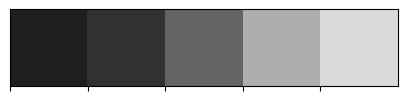

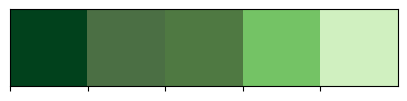

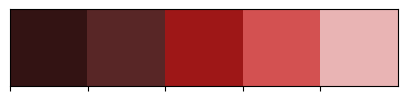

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

---

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings


labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

X_train = []
y_train = []
image_size = 150
# The dataset in a Kaggle environment is typically located under /kaggle/input
# Changing folderPath to reflect this
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    # The dataset in a Kaggle environment is typically located under /kaggle/input
    # Changing folderPath to reflect this
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 104.63it/s]


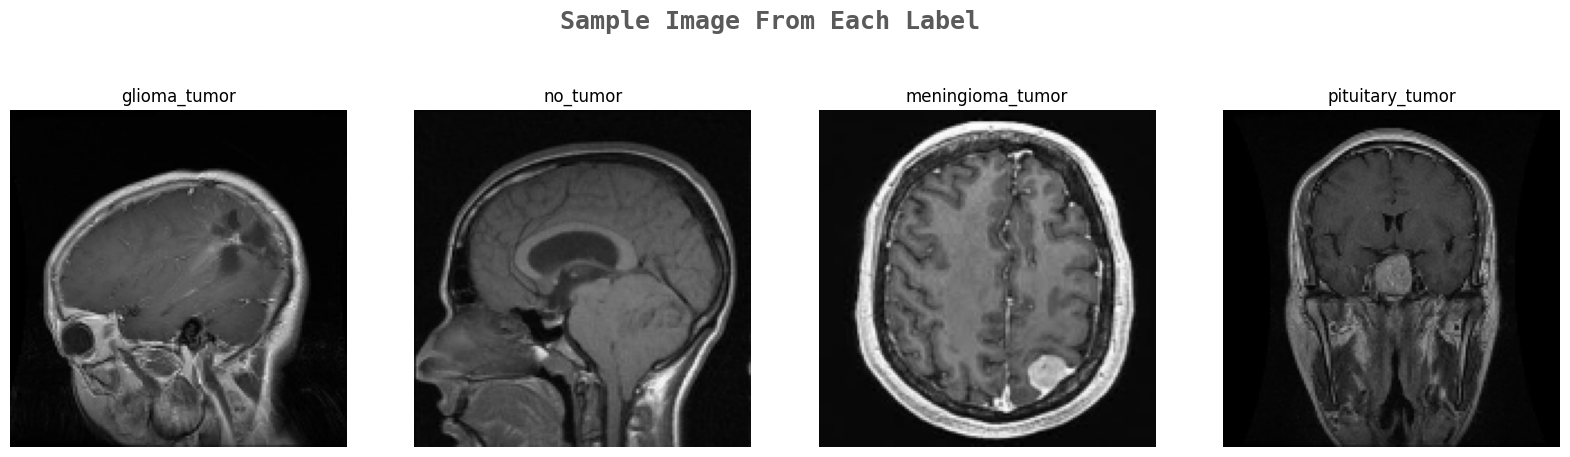

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

---

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 150, 150,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 150, 150,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 150, 150,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

We finally compile our model.

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

---

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.7264 - loss: 0.6545
Epoch 1: val_accuracy improved from -inf to 0.75850, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 130s 660ms/step - accuracy: 0.7277 - loss: 0.6520 - val_accuracy: 0.7585 - val_loss: 1.2516 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9235 - loss: 0.2253
Epoch 2: val_accuracy improved from 0.75850 to 0.88095, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.9236 - loss: 0.2251 - val_accuracy: 0.8810 - val_loss: 0.4283 - learning_rate: 0.0010
Epoch 3/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9596 - loss: 0.1203
Epoch 3: val_accuracy did not improve from 0.88095
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9595 - loss: 0.1208 - val_accuracy: 0.8537 - val_loss: 0.4416 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9690 - loss: 0.1016
Epoch 4: val_accuracy improved from 0.88095 to 0.92517, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9690 - loss: 0.1015 - val_accuracy: 0.9252 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 5/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9809 - loss: 0.0602
Epoch 5: val_accuracy did not improve from 0.92517
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9808 - loss: 0.0605 - val_accuracy: 0.7857 - val_loss: 0.7890 - learning_rate: 0.0010
Epoch 6/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9612 - loss: 0.1024
Epoch 6: val_accuracy did not improve from 0.92517

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9613 - loss: 0.1024 - val_accuracy: 0.9014 - val_loss: 0.2495 - learning_rate: 0.0010
Epoch 7/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9920 - loss: 0.0388
Epoch 7: val_accuracy improved from 0.92517 to 0.95578, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9920 - loss: 0.0387 - val_accuracy: 0.9558 - val_loss: 0.1142 - learning_rate: 3.0000e-04
Epoch 8/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9953 - loss: 0.0169
Epoch 8: val_accuracy did not improve from 0.95578
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.9558 - val_loss: 0.0978 - learning_rate: 3.0000e-04
Epoch 9/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 9: val_accuracy improved from 0.95578 to 0.95918, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 0.9592 - val_loss: 0.1068 - learning_rate: 3.0000e-04
Epoch 10/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9961 - loss: 0.0111
Epoch 10: val_accuracy improved from 0.95918 to 0.96599, saving model to effnet.h5


83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9961 - loss: 0.0111 - val_accuracy: 0.9660 - val_loss: 0.0937 - learning_rate: 3.0000e-04
Epoch 11/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9985 - loss: 0.0069
Epoch 11: val_accuracy did not improve from 0.96599
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9490 - val_loss: 0.1095 - learning_rate: 3.0000e-04
Epoch 12/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9981 - loss: 0.0052
Epoch 12: val_accuracy did not improve from 0.96599

Epoch 12: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 0.9660 - val_loss: 0.0781 - learning_rate: 3.0000e-04


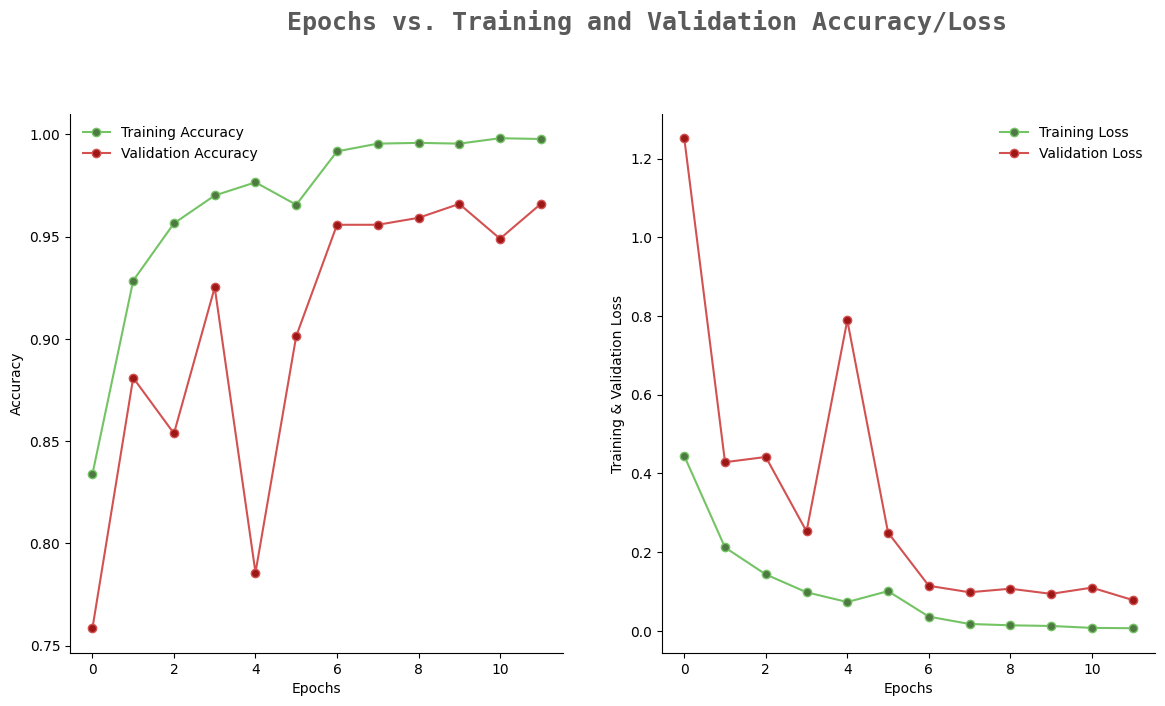

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

---

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 757ms/step


---

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        93
           1       0.98      1.00      0.99        51
           2       0.96      0.95      0.95        96
           3       0.98      1.00      0.99        87

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



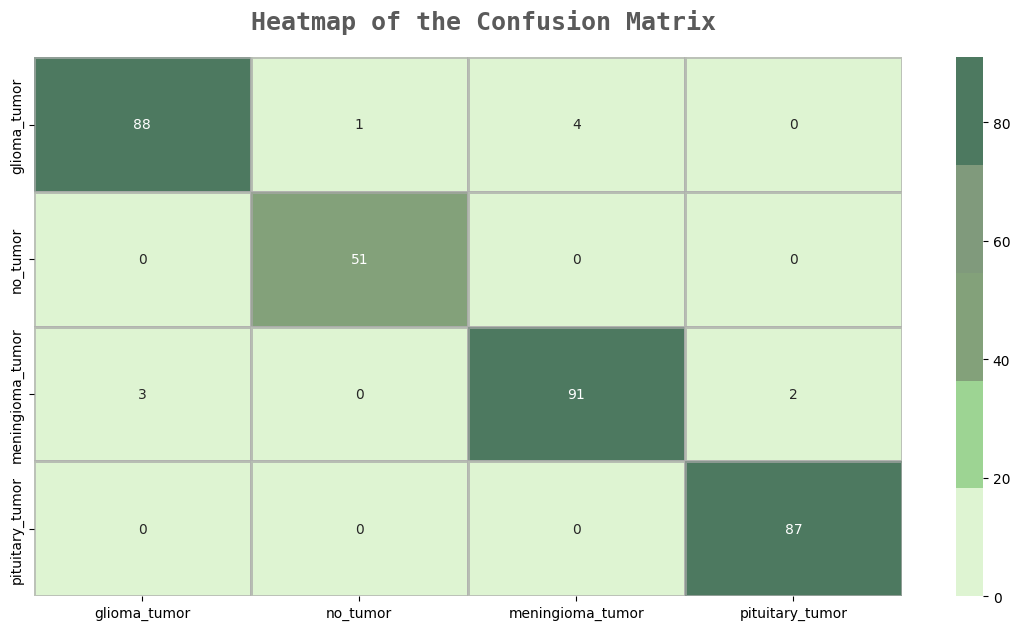

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

---

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

---

In [ ]:
model.save('tumor_shit.h5')

---

In [ ]:
!pip install fastapi uvicorn tensorflow opencv-python Pillow numpy nest-asyncio pyngrok

In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import JSONResponse
import numpy as np
import cv2
from PIL import Image
import io
import tensorflow as tf
from tensorflow.keras.models import load_model
from pathlib import Path
import nest_asyncio
import uvicorn
from threading import Thread
from pyngrok import ngrok
import requests
import os

# Initialize FastAPI app
app = FastAPI(title="Brain Tumor Classification API")

# Define model path (update this if your model is in a different location)
MODEL_PATH = Path("/content/tumor_shit.h5")  # Adjust if model name or path is different

# Load the trained model
try:
    model = load_model(MODEL_PATH)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    print("Model loaded and compiled successfully")
except Exception as e:
    print(f"Error loading model: {e}")
    raise HTTPException(status_code=500, detail="Model could not be loaded")

# Define image size for preprocessing
IMAGE_SIZE = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

@app.get("/")
async def root():
    return {"message": "Welcome to the Brain Tumor Classification API. Use /predict to upload an image for prediction."}

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        # Read the uploaded image
        contents = await file.read()
        img = Image.open(io.BytesIO(contents))

        # Convert PIL image to OpenCV format (BGR)
        opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # Resize image to match model input size
        img_resized = cv2.resize(opencvImage, (IMAGE_SIZE, IMAGE_SIZE))

        # Reshape for model input (batch_size, height, width, channels)
        img_reshaped = img_resized.reshape(1, IMAGE_SIZE, IMAGE_SIZE, 3)

        # Make prediction
        prediction = model.predict(img_reshaped)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        predicted_label = labels[predicted_class_index]
        confidence = float(np.max(prediction[0]))  # Convert to native Python float

        # Prepare response
        response = {
            "status": "success",
            "predicted_class": predicted_label,
            "confidence": confidence
        }

        return JSONResponse(content=response)

    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Error processing image: {str(e)}")

# Apply nest-asyncio to handle nested event loops in Colab
nest_asyncio.apply()

# Set up ngrok authtoken (replace 'YOUR_NGROK_AUTHTOKEN' with your actual token)
ngrok.set_auth_token("2wAD5nyt08w4EAkUa50fSTd7GOC_31W7y4cpga8Eq7yhDfkEz")  # Replace with your ngrok authtoken

# Function to run the Uvicorn server
def run_server():
    uvicorn.run(app, host="0.0.0.0", port=8000, log_level="info")

# Start the server in a background thread
server_thread = Thread(target=run_server)
server_thread.start()

# Create a tunnel to the local server using ngrok
public_url = ngrok.connect(8000)
print(f"Server is running. Access the API at: {public_url}/docs")

# Function to test the API with a local image
def test_local_image(image_path):
    print(f"\nTesting API with local image: {image_path}")
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return

    try:
        # Read the image file as binary
        with open(image_path, "rb") as file:
            files = {"file": file}
            # Send POST request to the local server (using the local port, not ngrok)
            response = requests.post("http://127.0.0.1:8000/predict", files=files)

        if response.status_code == 200:
            print("Prediction successful:")
            print(response.json())
        else:
            print(f"Error in prediction. Status code: {response.status_code}")
            print(response.text)
    except Exception as e:
        print(f"Error during test: {str(e)}")

# Test with a local image (update the path to your uploaded test image)
TEST_IMAGE_PATH = "/content/Te-me_0011.jpg"  # Replace with your test image path
test_local_image(TEST_IMAGE_PATH)

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-19' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=SystemExit(1)>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 163, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1536, in create_server
    raise OSError(err.errno, msg) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-43-9f430415435d>", line 80, in run

Model loaded and compiled successfully


INFO:     Started server process [993]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2wADCAjO7LtPTuh8z7xddylTaK7, tn_2wADZDLPoN5KBJkGygnwDDn60CP, tn_2wADlmtA9IFmILM5k3djCp7BnAl\n\r\n\r\nERR_NGROK_324\r\n"}}


In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import JSONResponse
import numpy as np
import cv2
from PIL import Image
import io
import tensorflow as tf
from tensorflow.keras.models import load_model
from pathlib import Path
import nest_asyncio
import uvicorn
from threading import Thread
from pyngrok import ngrok
import requests
import os

# Initialize FastAPI app
app = FastAPI(title="Brain Tumor Classification API")

# Define model path (update this if your model is in a different location)
MODEL_PATH = Path("/content/tumor_shit.h5")  # Adjust if model name or path is different

# Load the trained model
try:
    model = load_model(MODEL_PATH)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    print("Model loaded and compiled successfully")
except Exception as e:
    print(f"Error loading model: {e}")
    raise HTTPException(status_code=500, detail="Model could not be loaded")

# Define image size for preprocessing
IMAGE_SIZE = 150
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

@app.get("/")
async def root():
    return {"message": "Welcome to the Brain Tumor Classification API. Use /predict to upload an image for prediction."}

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        # Read the uploaded image
        contents = await file.read()
        img = Image.open(io.BytesIO(contents))

        # Convert PIL image to OpenCV format (BGR)
        opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # Resize image to match model input size
        img_resized = cv2.resize(opencvImage, (IMAGE_SIZE, IMAGE_SIZE))

        # Reshape for model input (batch_size, height, width, channels)
        img_reshaped = img_resized.reshape(1, IMAGE_SIZE, IMAGE_SIZE, 3)

        # Make prediction
        prediction = model.predict(img_reshaped)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        predicted_label = labels[predicted_class_index]
        confidence = float(np.max(prediction[0]))  # Convert to native Python float

        # Prepare response
        response = {
            "status": "success",
            "predicted_class": predicted_label,
            "confidence": confidence
        }

        return JSONResponse(content=response)

    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Error processing image: {str(e)}")

# Apply nest-asyncio to handle nested event loops in Colab
nest_asyncio.apply()

# Set up ngrok authtoken (replace 'YOUR_NGROK_AUTHTOKEN' with your actual token)
ngrok.set_auth_token("2wAD5nyt08w4EAkUa50fSTd7GOC_31W7y4cpga8Eq7yhDfkEz")  # Replace with your ngrok authtoken

# Function to run the Uvicorn server
def run_server():
    uvicorn.run(app, host="0.0.0.0", port=8000, log_level="info")

# Start the server in a background thread
server_thread = Thread(target=run_server)
server_thread.start()

# **Try to connect to a different region:**
try:
    # Create a tunnel to the local server using ngrok in 'us' region
    public_url = ngrok.connect(8000, region="us")
    print(f"Server is running. Access the API at: {public_url}/docs")
except PyngrokNgrokHTTPError as e:
    # If the 'us' region is also full, suggest closing other tunnels
    print(f"Error connecting to ngrok: {e}")
    print("Please ensure you have no other active ngrok tunnels, and then try again.")

# Function to test the API with a local image
def test_local_image(image_path):
    print(f"\nTesting API with local image: {image_path}")
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return

    try:
        # Read the image file as binary
        with open(image_path, "rb") as file:
            files = {"file": file}
            # Send POST request to the local server (using the local port, not ngrok)
            response = requests.post("http://127.0.0.1:8000/predict", files=files)

        if response.status_code == 200:
            print("Prediction successful:")
            print(response.json())
        else:
            print(f"Error in prediction. Status code: {response.status_code}")
            print(response.text)
    except Exception as e:
        print(f"Error during test: {str(e)}")

# Test with a local image (update the path to your uploaded test image)
TEST_IMAGE_PATH = "/content/Te-me_0011.jpg"  # Replace with your test image path
test_local_image(TEST_IMAGE_PATH)

Model loaded and compiled successfully


INFO:     Started server process [993]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


NameError: name 'PyngrokNgrokHTTPError' is not defined